# Tests to validate lost light calculations

**Scott Prahl**

**April 2024**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mcmlpy import MCMLRun

%config InlineBackend.figure_format='retina'

ImportError: cannot import name 'MCMLRun' from 'mcmlpy' (/Users/prahl/Documents/Code/git/mcmlpy/mcmlpy/__init__.py)

## Index matched sample

In [43]:
mus = 9.9
mua = 0.1
d = 1
g = 0
beam_radius = 5
specular = 0              	#Specular reflectance [-]
Rd_total =0.740705       	#Diffuse reflectance [-]
abs_total = 0.174267       	#Absorbed fraction [-]
tt_total = 0.085028       	#Transmittance [-]


In [38]:
!iad -a 0.99 -b 10 -d 1 -z -V 0

     0	   0.0000	   0.7409	   0.0000	   0.0848	   0.1000	   9.9000	   0.0000	 * 


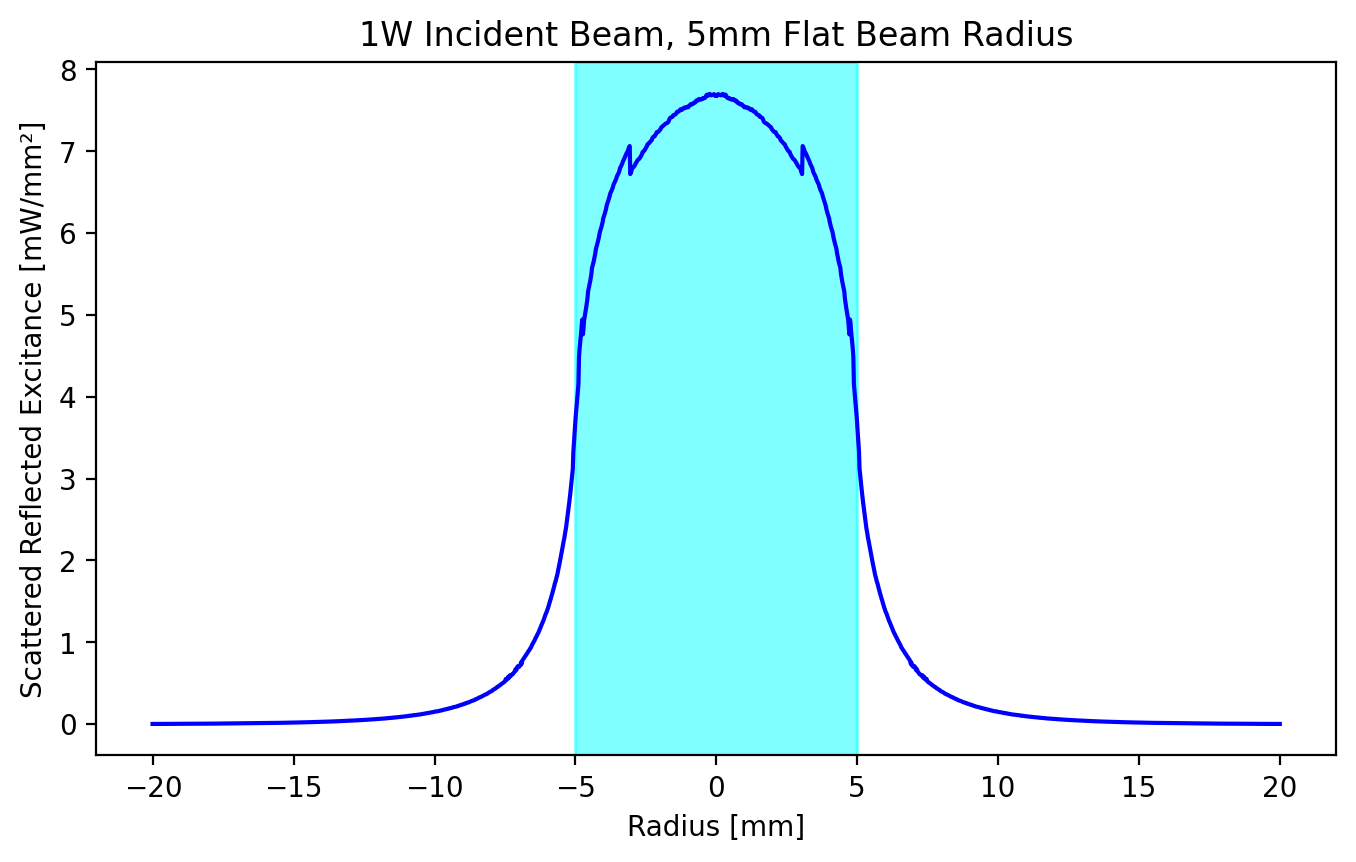

In [44]:
path = '../tests/mc-lost-v1-1.Rrc'

r, rd = np.genfromtxt(path, skip_header=1).T
r *= 10
rd = rd / 100 * 1000

plt.figure(figsize=(8,4.5))
plt.plot(r, rd, color='blue')
plt.plot(-r, rd, color='blue')

plt.axvspan(-beam_radius, beam_radius, color='cyan', alpha=0.5)
plt.xlabel('Radius [mm]')
plt.ylabel('Scattered Reflected Excitance [mW/mm²]')
plt.title('1W Incident Beam, 5mm Flat Beam Radius')
plt.show()

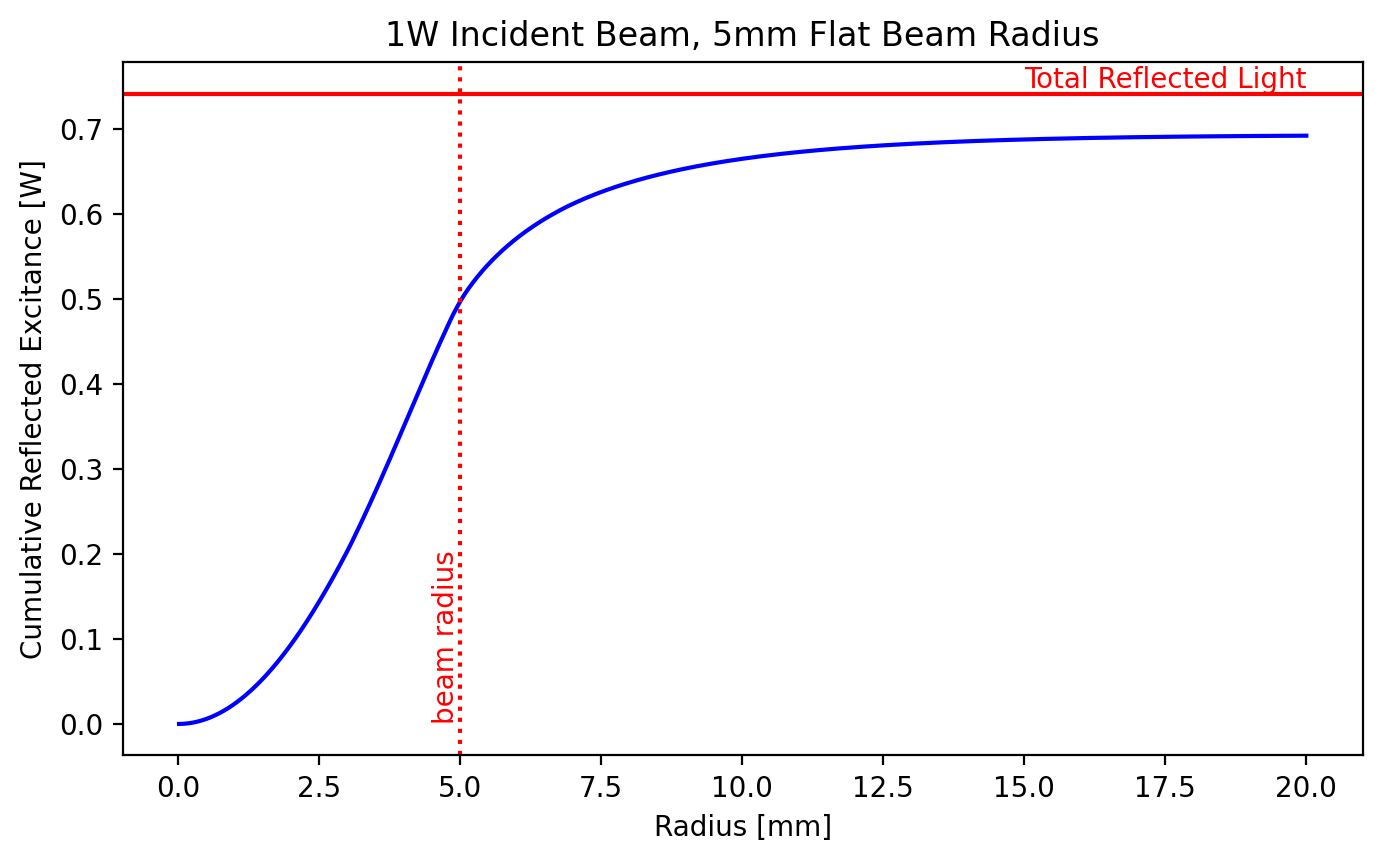

In [45]:
disks = np.pi * r**2
areas = np.diff(disks)
areas = np.concatenate(([disks[0]], areas))
cumrd = np.cumsum(rd*areas)/1000

plt.figure(figsize=(8,4.5))
plt.plot(r, cumrd, color='blue')
plt.axhline(Rd_total, color='red')
plt.text(r[-1], Rd_total, 'Total Reflected Light', ha='right', va='bottom', color='red')

plt.axvline(beam_radius, color='red', ls=':')
plt.xlabel('Radius [mm]')
plt.text(beam_radius, 0, 'beam radius', ha='right', va='bottom', color='red', rotation=90)

plt.ylabel('Cumulative Reflected Excitance [W]')
plt.title('1W Incident Beam, 5mm Flat Beam Radius')
plt.show()

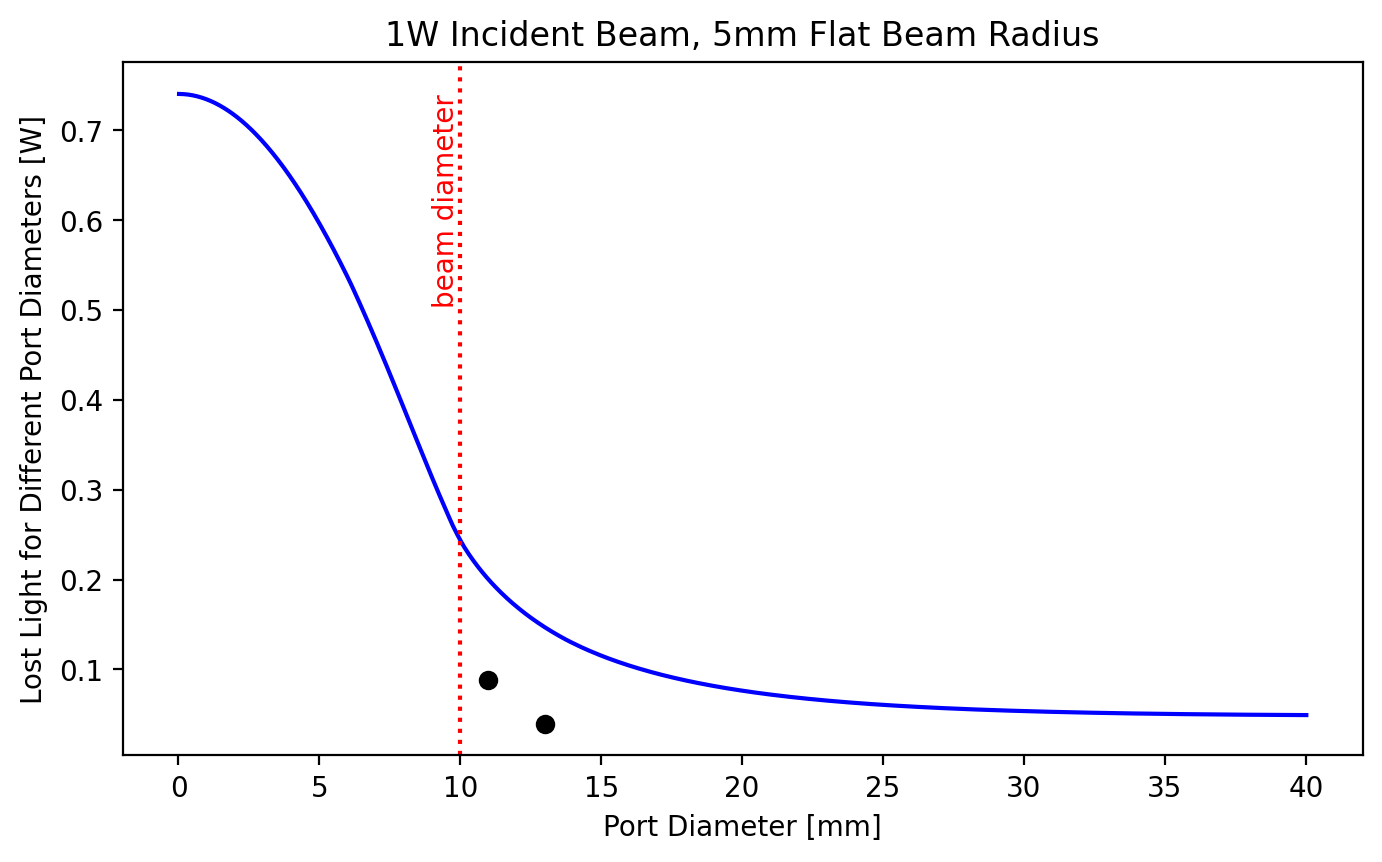

In [46]:
plt.figure(figsize=(8,4.5))
plt.plot(2*r, Rd_total-cumrd, color='blue')
plt.plot([11,13],   [0.08829,0.03921], 'ok')

plt.axvline(2*beam_radius, color='red', ls=':')
plt.xlabel('Port Diameter [mm]')
plt.text(2*beam_radius, Rd_total, 'beam diameter', ha='right', va='top', color='red', rotation=90)

plt.ylabel('Lost Light for Different Port Diameters [W]')
plt.title('1W Incident Beam, 5mm Flat Beam Radius')
plt.show()

## Sample with index 1.4

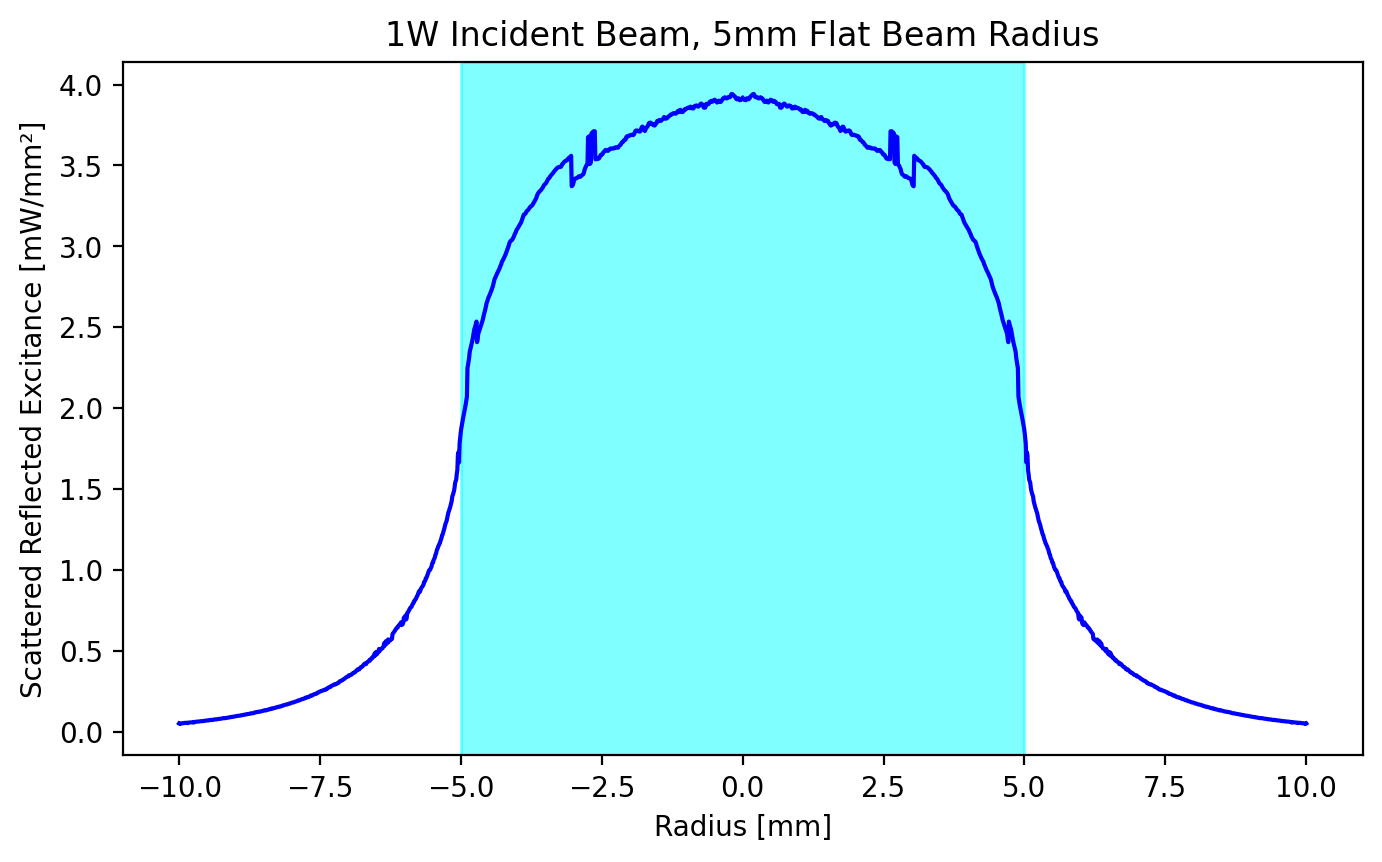

In [2]:
path = '../tests/mus=10-beam-5mm.Rrc'

beam_radius = 5
Rd_total = 0.366157 #Diffuse reflectance [-]
tt_total = 0.0513523 #Transmittance [-]
specular = 0.0277778      	#Specular reflectance [-]
abs_total = 0.554713       	#Absorbed fraction [-]

r, rd = np.genfromtxt(path, skip_header=1).T
r *= 10
rd = rd / 100 * 1000

plt.figure(figsize=(8,4.5))
plt.plot(r, rd, color='blue')
plt.plot(-r, rd, color='blue')

plt.axvspan(-beam_radius, beam_radius, color='cyan', alpha=0.5)
plt.xlabel('Radius [mm]')
plt.ylabel('Scattered Reflected Excitance [mW/mm²]')
plt.title('1W Incident Beam, 5mm Flat Beam Radius')
plt.show()

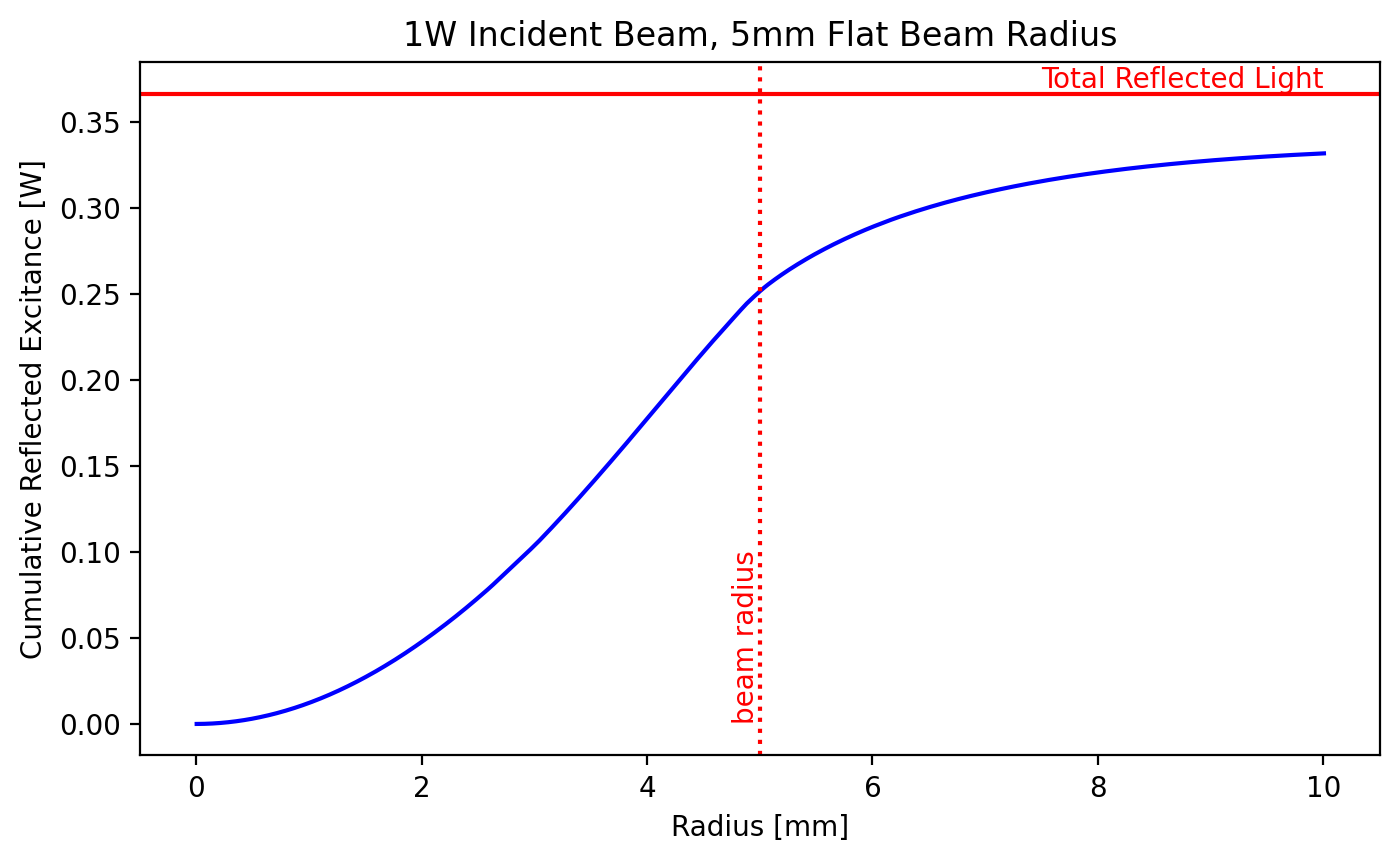

In [3]:
disks = np.pi * r**2
areas = np.diff(disks)
areas = np.concatenate(([disks[0]], areas))
cumrd = np.cumsum(rd*areas)/1000

plt.figure(figsize=(8,4.5))
plt.plot(r, cumrd, color='blue')
plt.axhline(Rd_total, color='red')
plt.text(r[-1], Rd_total, 'Total Reflected Light', ha='right', va='bottom', color='red')

plt.axvline(beam_radius, color='red', ls=':')
plt.xlabel('Radius [mm]')
plt.text(beam_radius, 0, 'beam radius', ha='right', va='bottom', color='red', rotation=90)

plt.ylabel('Cumulative Reflected Excitance [W]')
plt.title('1W Incident Beam, 5mm Flat Beam Radius')
plt.show()

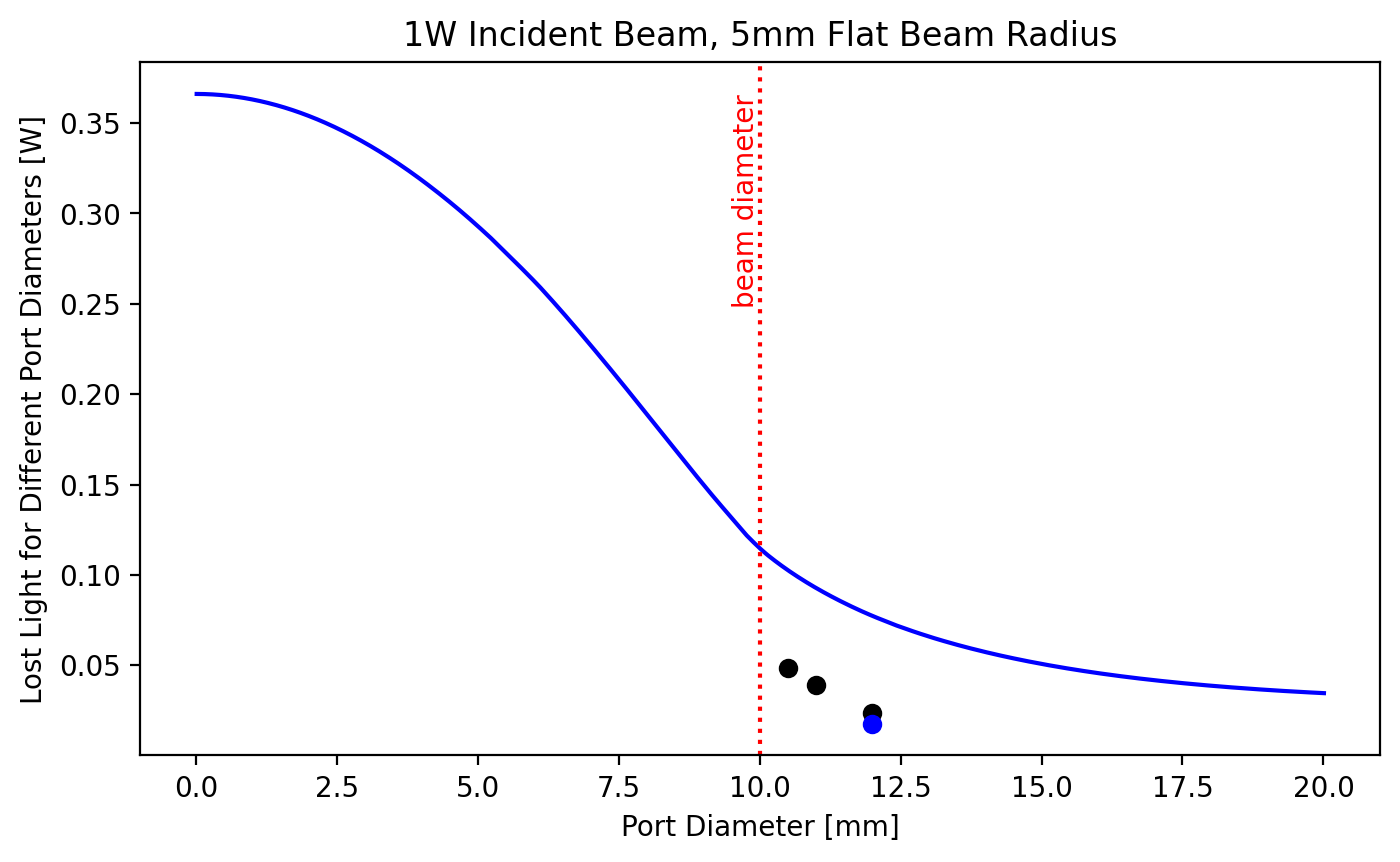

In [23]:
plt.figure(figsize=(8,4.5))
plt.plot(2*r, Rd_total-cumrd, color='blue')
plt.plot([10.5,11,12],   [0.04835,0.03898,0.02335], 'ok')
plt.plot([12],   [0.01750], 'ob')

plt.axvline(2*beam_radius, color='red', ls=':')
plt.xlabel('Port Diameter [mm]')
plt.text(2*beam_radius, Rd_total, 'beam diameter', ha='right', va='top', color='red', rotation=90)

plt.ylabel('Lost Light for Different Port Diameters [W]')
plt.title('1W Incident Beam, 5mm Flat Beam Radius')
plt.show()

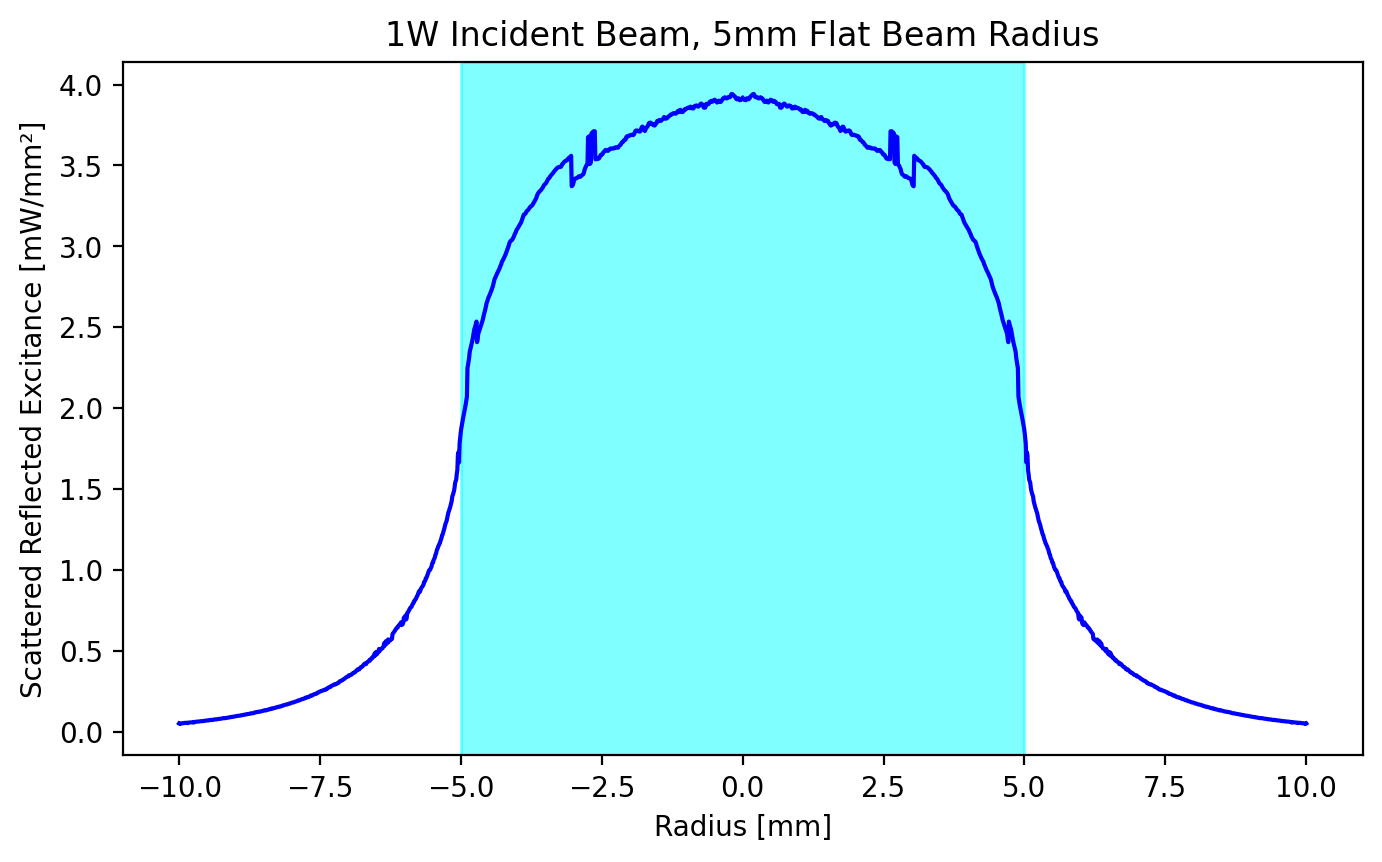

In [24]:
path = '../tests/mus=10-beam-5mm.Rrc'

r2, rd2 = np.genfromtxt(path, skip_header=1).T
r2 *= 10
rd2 = rd2 / 100 * 1000

plt.figure(figsize=(8,4.5))
plt.plot(r, rd2, color='blue')
plt.plot(-r, rd2, color='blue')

plt.axvspan(-5, 5, color='cyan', alpha=0.5)
plt.xlabel('Radius [mm]')
plt.ylabel('Scattered Reflected Excitance [mW/mm²]')
plt.title('1W Incident Beam, 5mm Flat Beam Radius')
plt.show()

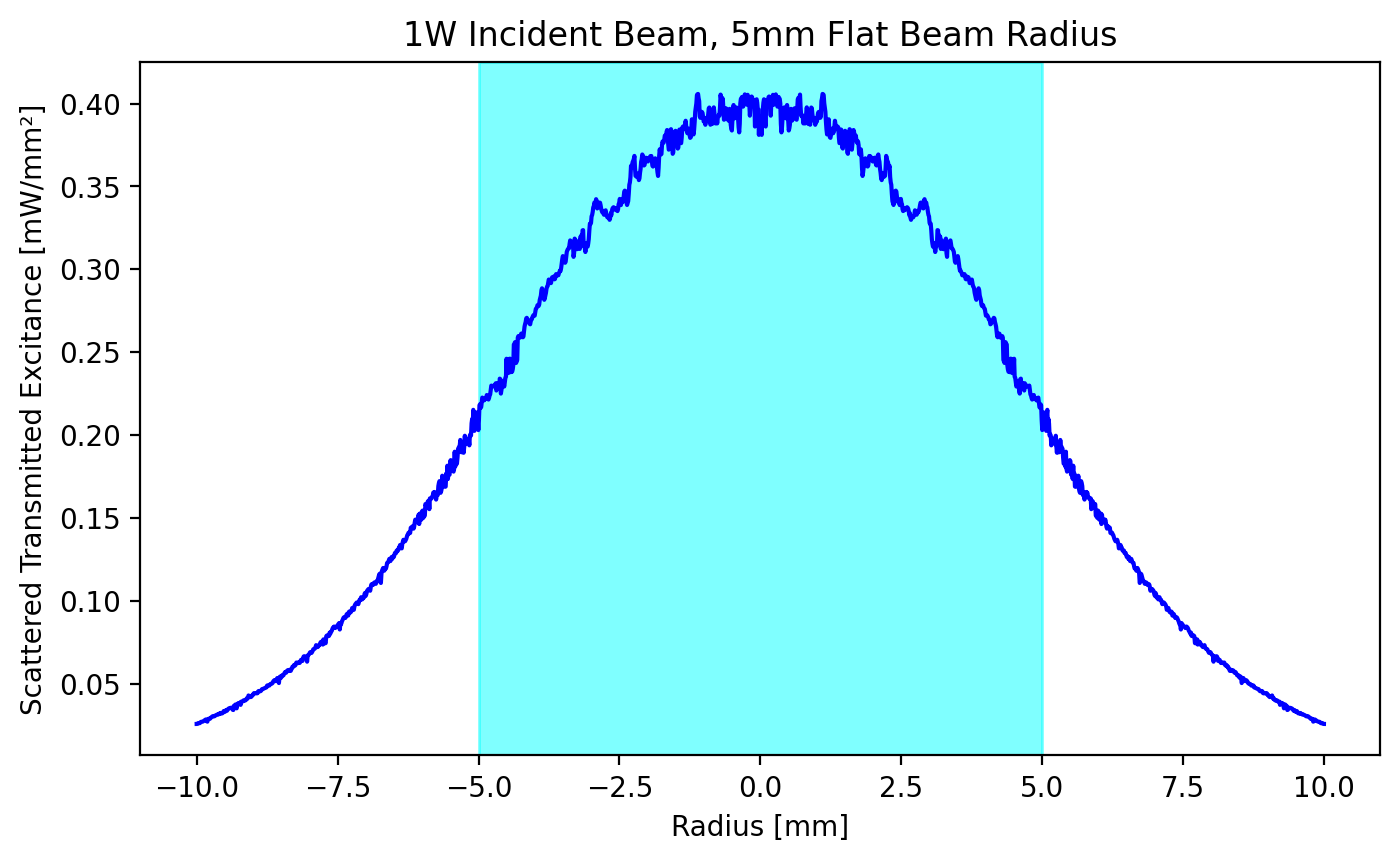

In [4]:
path = '../tests/mus=10-beam-5mm.Trc'

r, td = np.genfromtxt(path, skip_header=1).T
r *= 10
td = td / 100 * 1000

plt.figure(figsize=(8,4.5))
plt.plot(r, td, color='blue')
plt.plot(-r, td, color='blue')

plt.axvspan(-5, 5, color='cyan', alpha=0.5)
plt.xlabel('Radius [mm]')
plt.ylabel('Scattered Transmitted Excitance [mW/mm²]')
plt.title('1W Incident Beam, 5mm Flat Beam Radius')
plt.show()

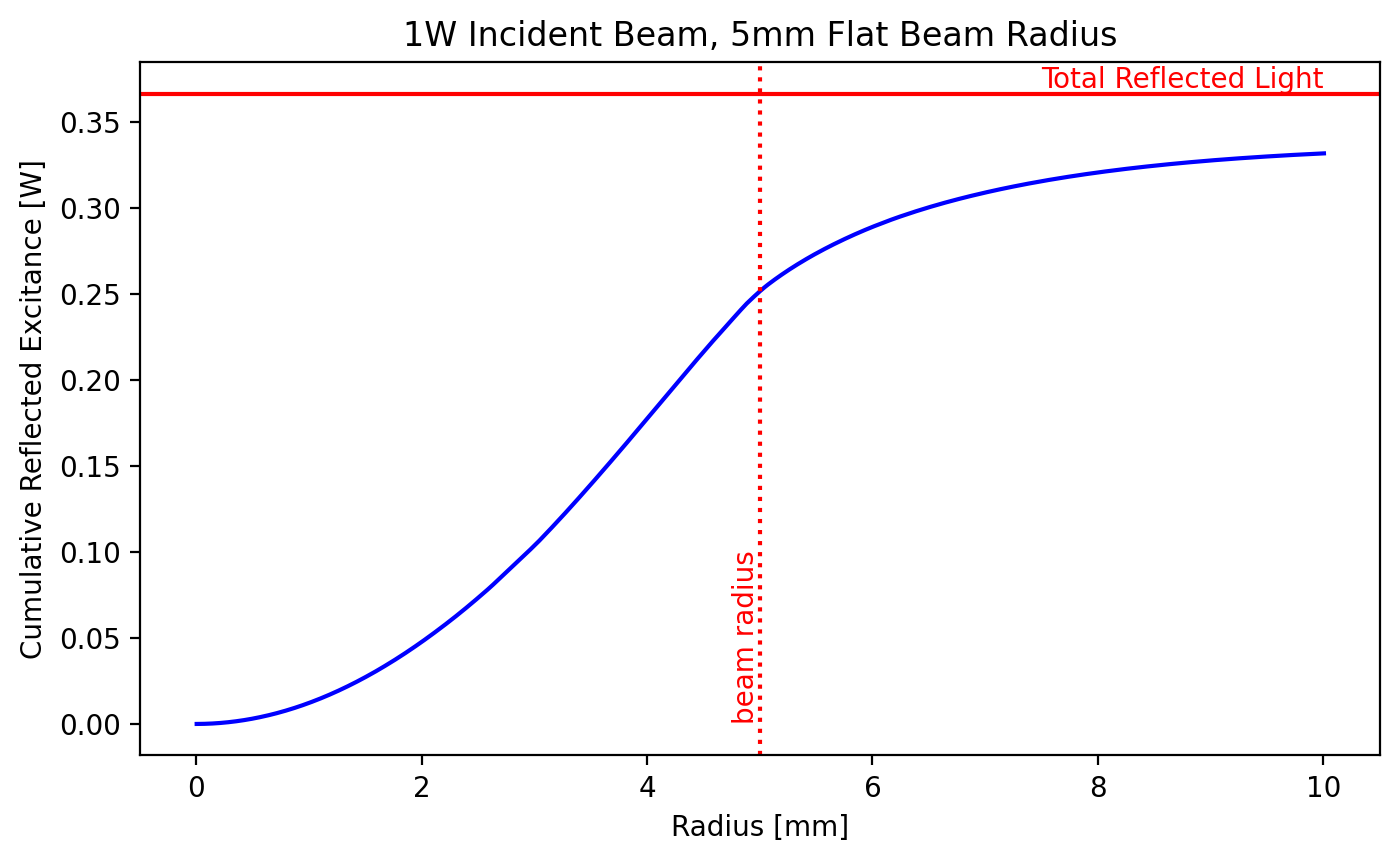

In [26]:
disks2 = np.pi * r2**2
areas2 = np.diff(disks2)
areas2 = np.concatenate(([disks2[0]], areas2))
cumrd2 = np.cumsum(rd2*areas2)/1000

plt.figure(figsize=(8,4.5))
plt.plot(r, cumrd2, color='blue')
plt.axhline(Rd_total, color='red')
plt.text(r[-1], Rd_total, 'Total Reflected Light', ha='right', va='bottom', color='red')

plt.axvline(beam_radius, color='red', ls=':')
plt.xlabel('Radius [mm]')
plt.text(beam_radius, 0, 'beam radius', ha='right', va='bottom', color='red', rotation=90)

plt.ylabel('Cumulative Reflected Excitance [W]')
plt.title('1W Incident Beam, 5mm Flat Beam Radius')
plt.show()

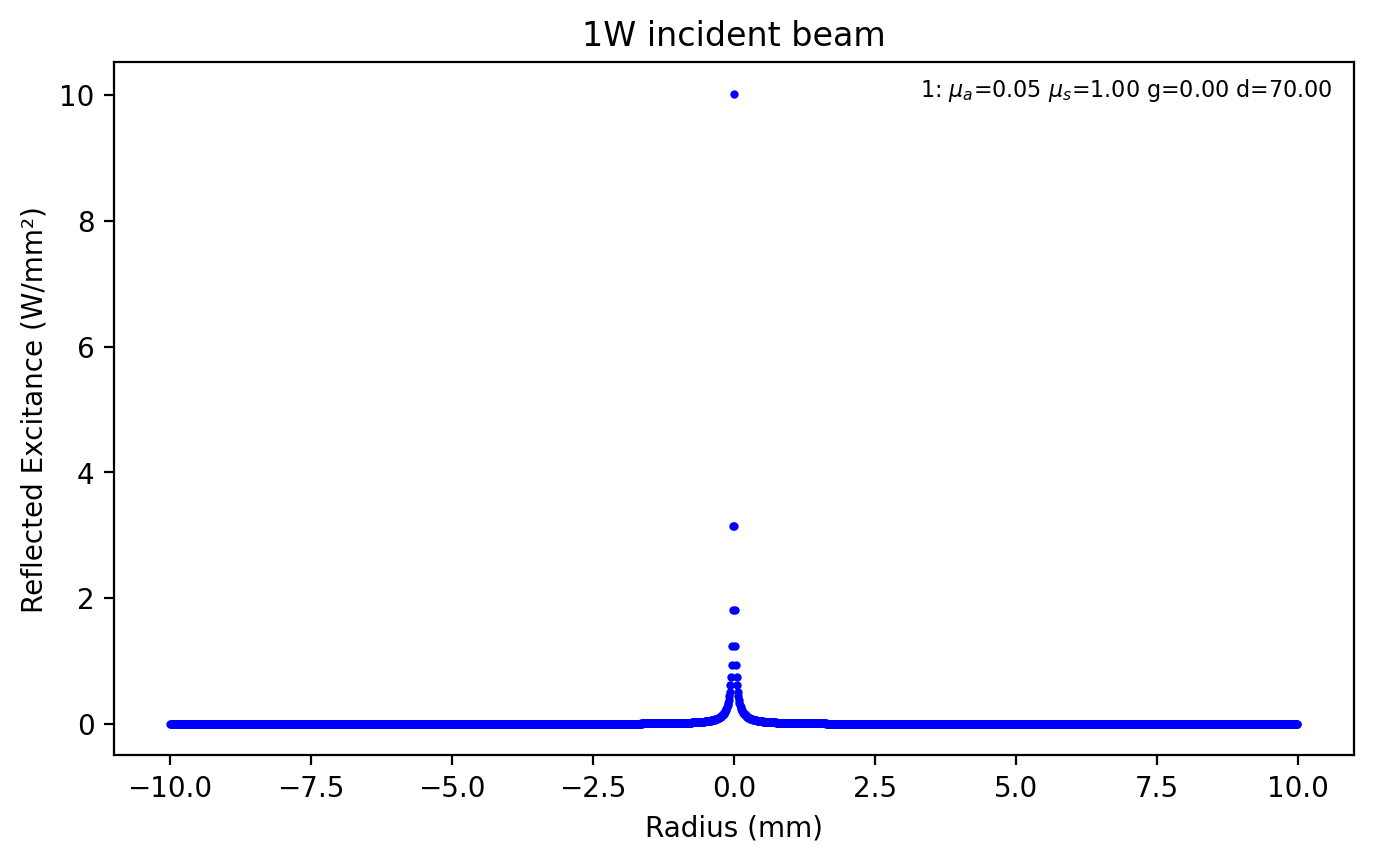

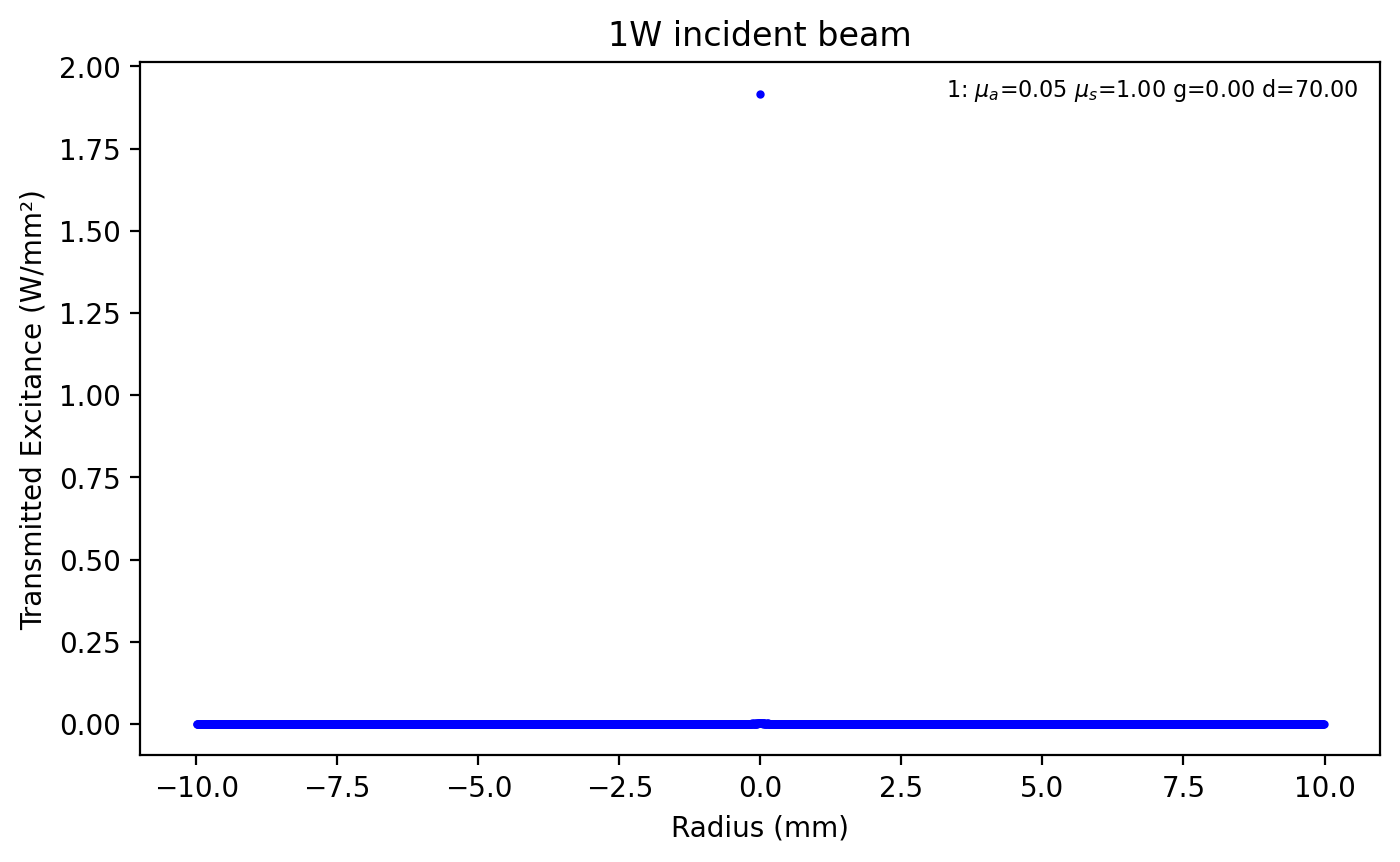

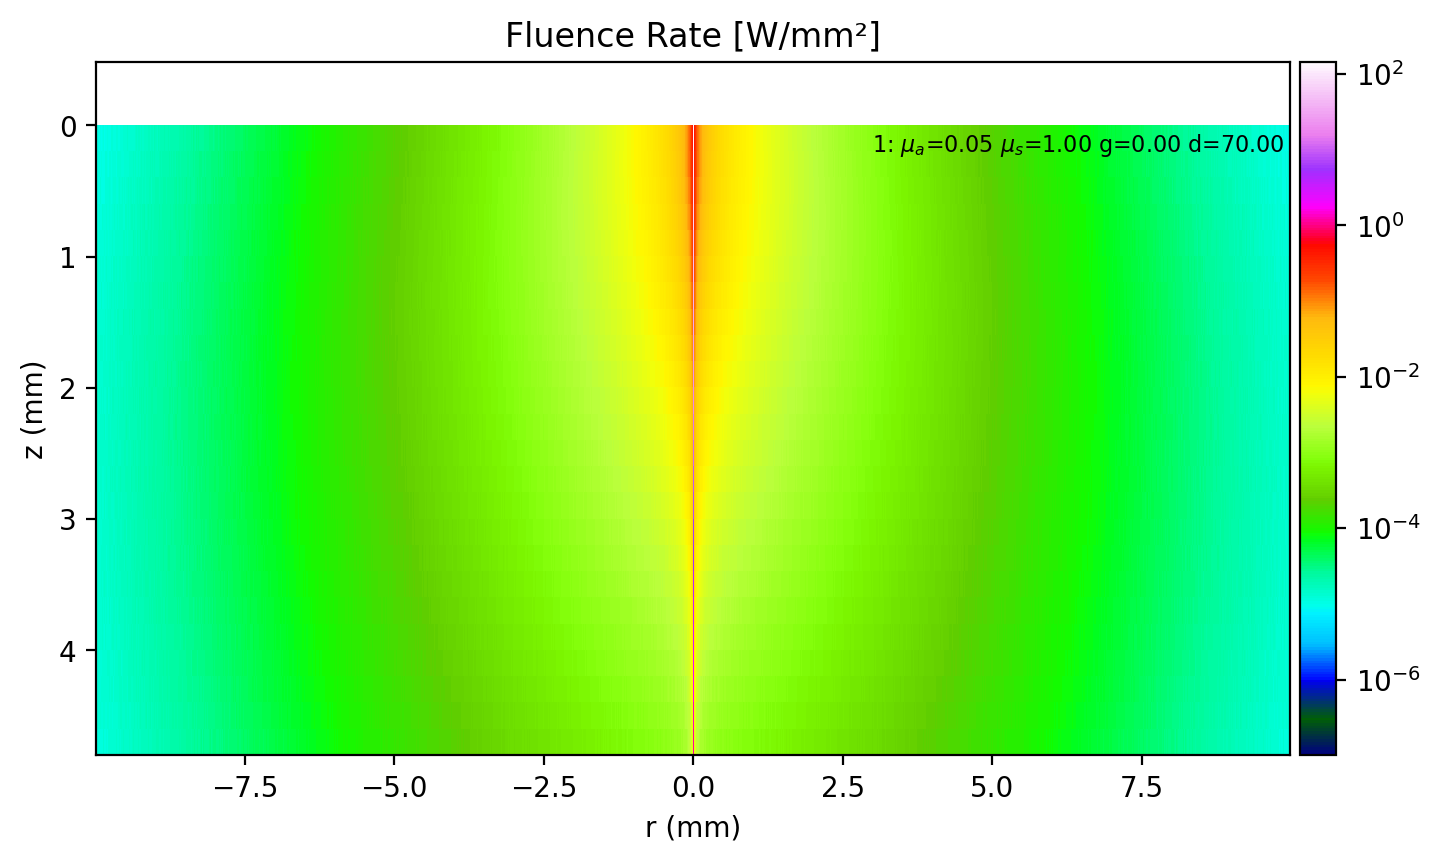

A1 


In [8]:
path= '/Users/prahl/Library/CloudStorage/Dropbox/code/c/optics/mc/mcml-2019/mcR5unix/mcmlcode/'
filename = path + '1mm.mco'

filename = '../tests/mus=10.mco'

s = MCMLRun()
s.init_from_file(filename)
s.plot_reflectance()
s.plot_transmittance()

s.plot_fluence(1e-7)
print(s.mcml_data_version)

In [6]:
print(s.Rdr)

[2.0475e+00 4.4942e-01 2.2191e-01 1.3720e-01 9.5003e-02 6.8762e-02
 5.1813e-02 3.9897e-02 3.1181e-02 2.4647e-02 1.9792e-02 1.5858e-02
 1.2702e-02 1.0298e-02 8.3801e-03 6.8132e-03 5.6464e-03 4.6125e-03
 3.7904e-03 3.1493e-03 2.6213e-03 2.1509e-03 1.7744e-03 1.4776e-03
 1.2402e-03 1.0254e-03 8.5764e-04 7.1540e-04 5.9360e-04 4.9341e-04
 4.1148e-04 3.4211e-04 2.8397e-04 2.3104e-04 2.0190e-04 1.7017e-04
 1.4008e-04 1.1059e-04 9.5004e-05 8.3601e-05 7.1614e-05 5.4639e-05
 4.8901e-05 4.2542e-05 3.5870e-05 2.9049e-05 2.3410e-05 1.9672e-05
 1.5951e-05 1.4195e-05 1.2446e-05 1.0847e-05 8.8482e-06 6.1857e-06
 6.0458e-06 4.4023e-06 3.6705e-06 2.9235e-06 2.8076e-06 2.4360e-06
 2.2595e-06 1.7027e-06 1.2867e-06 1.1069e-06 1.1341e-06 1.0051e-06
 9.4403e-07 8.8165e-07 7.9017e-07 4.9815e-07 3.9734e-07 1.9598e-07
 2.3844e-07 1.4764e-07 1.4396e-07 1.7295e-07 1.0205e-07 5.1597e-08
 1.4203e-07 9.0643e-08 7.1431e-08 9.2290e-08 5.6347e-08 9.9893e-08
 9.5794e-09 2.7551e-08 1.7359e-08 1.8492e-08 8.5590e-09 3.7230

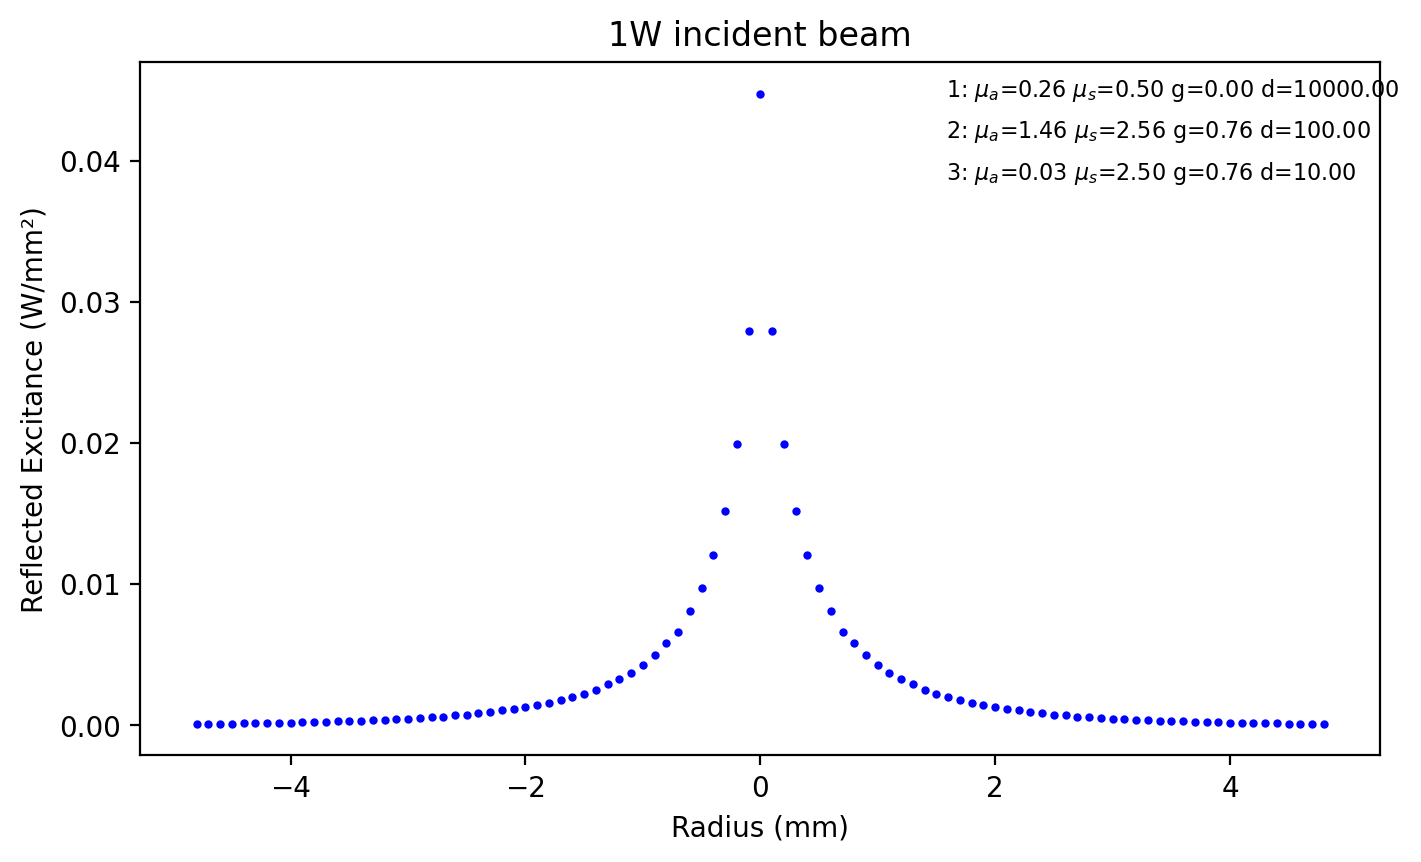

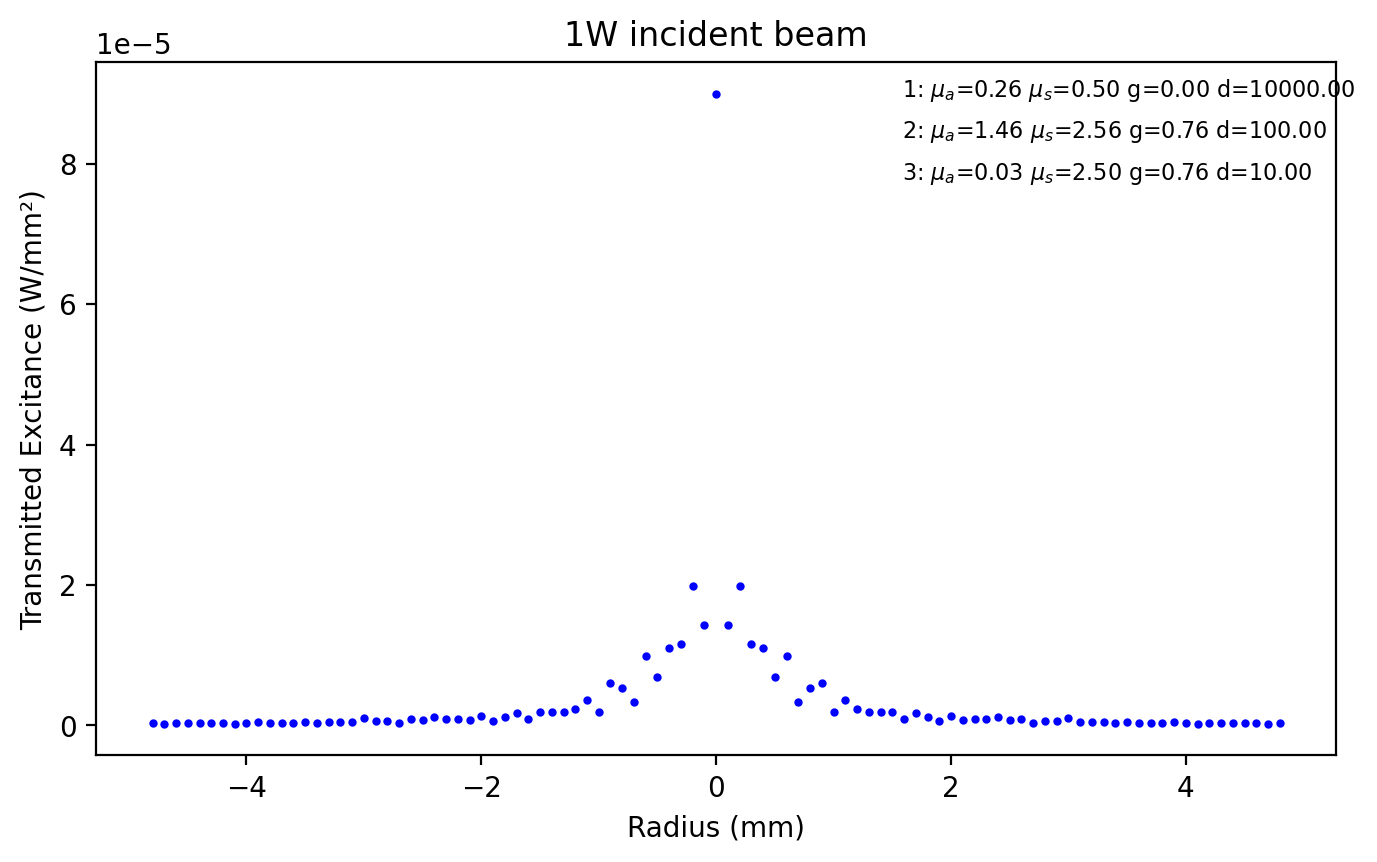

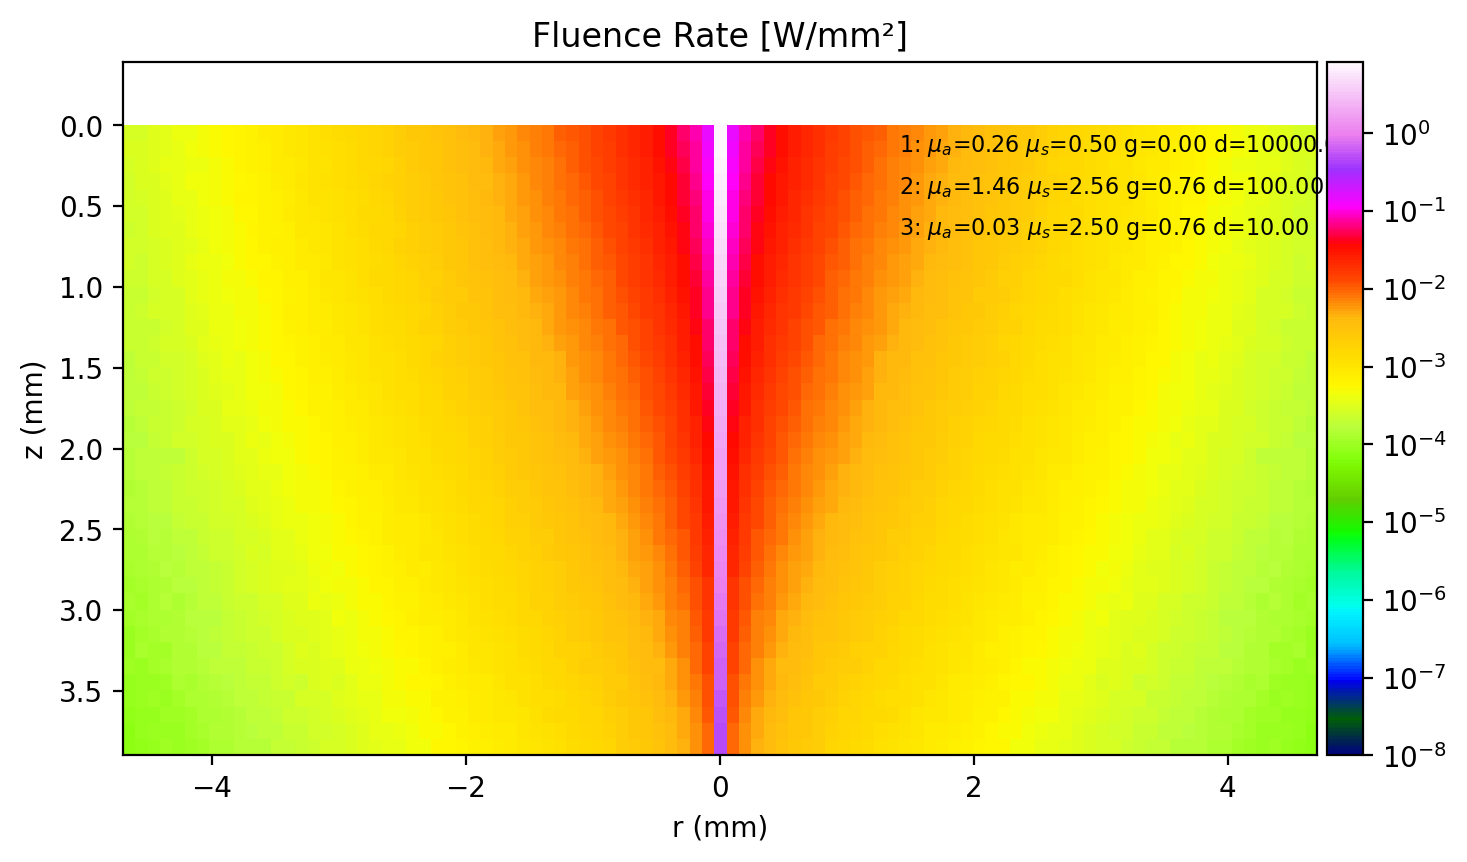

In [7]:
path= '/Users/prahl/Library/CloudStorage/Dropbox/code/c/optics/mc/mcml-2019/mcR5unix/data/'
filename = path + 'skin2.mco'

s = MCMLRun()
s.init_from_file(filename)
s.plot_reflectance()
s.plot_transmittance()

s.plot_fluence(1e-8)
print(s)